In [52]:
from random import randint, betavariate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime, timedelta, date, time
import pylab
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15, 10)

In [53]:
df = pd.read_excel('../datasets/iCafe_train.xlsx')

In [54]:
df['Order_time_sec'] = pd.to_timedelta(df.Order_time) // np.timedelta64(1,'s') # Создаем столбец
df

,Order_time,Delivery_time,Office,Order_time_sec
0,0:03:35,12,0,215
1,0:07:14,6,1,434
2,0:11:30,9,1,690
3,0:13:48,12,0,828
4,0:14:36,2,1,876
...,...,...,...,...
275,23:39:14,3,1,85154
276,23:40:55,9,1,85255
277,23:45:19,6,1,85519
278,23:47:07,4,1,85627


In [55]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [56]:
"""Выполнение задания 1"""

def Processing_results(sc, lr, df, target, attribute_name, name, add_schedule = []):
    X_std = sc.transform(df[attribute_name])
    new_col_name = []
    for i, col_name in enumerate(attribute_name):
        s = col_name + '_std_' + name
        df[s] = X_std[:,i]
        new_col_name.append(s)
    y_pred = 'y_pred_' + name
    Correct = 'Correct_' + name
    df[y_pred] = lr.predict(X_std)
    df[Correct] = df.Office == df[y_pred]
    print(classification_report(df.Office, df[y_pred]))
    sns.pairplot(df[[Correct] + new_col_name], hue = Correct, height=round(12/len(new_col_name), 1))
    plt.show()
    for k in range(len(add_schedule)):
        i,j = add_schedule[k]
        i = i+'_std_'+name
        j = j+'_std_'+name
        plt.scatter(df[i][True ^ df[Correct]], df[j][True ^ df[Correct]], color = 'red')
        plt.scatter(df[i][df[Correct]], df[j][df[Correct]])
        plt.legend(['Определены не верно', 'Определены верно'])
        plt.xlabel(i)
        plt.ylabel(j)
        plt.show()
    return df

In [58]:
def time_change(df):
    col = df.Order_time_sec[(df.Office == 0)]
    delta = 86399 - col.max()
    df['Order_time_sec_delta'] = (df.Order_time_sec + delta) % 86400
    return (df)

def log_reg(y,X):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)
    sc = StandardScaler()
    sc.fit(X_train)                                  # Находим среднее и стандартное отклонение обучающей выборки
    X_train_std = sc.transform(X_train)              # Преобразовываем обучающую выборку
    X_test_std = sc.transform(X_test) 
    
    lr = LogisticRegression(random_state=21)
    lr.fit(X_train_std, y_train)
    return (sc, lr)
    

              precision    recall  f1-score   support

           0       0.91      0.88      0.90        98
           1       0.94      0.96      0.95       182

    accuracy                           0.93       280
   macro avg       0.93      0.92      0.92       280
weighted avg       0.93      0.93      0.93       280



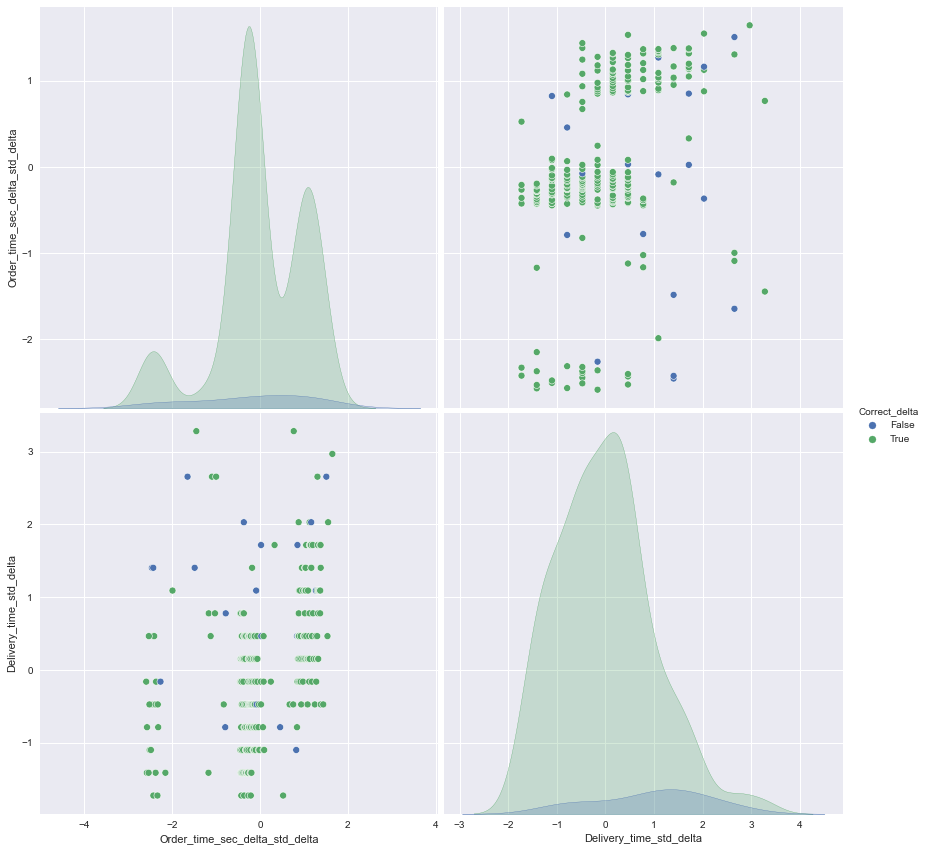

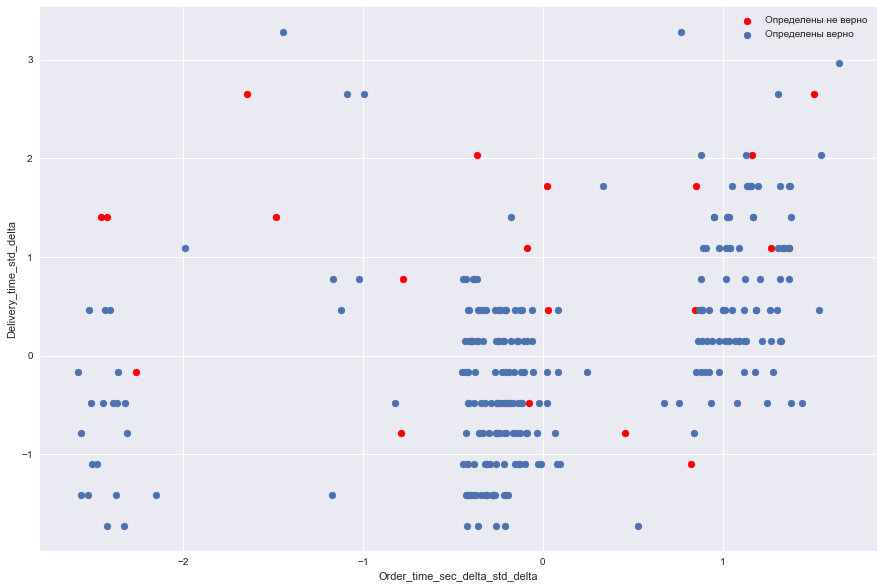

,Order_time,Delivery_time,Office,Order_time_sec,Order_time_sec_delta,Order_time_sec_delta_std_delta,Delivery_time_std_delta,y_pred_delta,Correct_delta
0,0:03:35,12,0,215,5877,-2.456039,1.403727,1,False
1,0:07:14,6,1,434,6096,-2.444885,-0.473870,1,True
2,0:11:30,9,1,690,6352,-2.431846,0.464929,1,True
3,0:13:48,12,0,828,6490,-2.424817,1.403727,1,False
4,0:14:36,2,1,876,6538,-2.422372,-1.725600,1,True
...,...,...,...,...,...,...,...,...,...
275,23:39:14,3,1,85154,4416,-2.530453,-1.412668,1,True
276,23:40:55,9,1,85255,4517,-2.525309,0.464929,1,True
277,23:45:19,6,1,85519,4781,-2.511863,-0.473870,1,True
278,23:47:07,4,1,85627,4889,-2.506362,-1.099735,1,True


In [59]:
"""Запустите, после написания функций"""

df = time_change(df)
y = 'Office'
x = ['Order_time_sec_delta', 'Delivery_time']
sc_delta, lr_delta = log_reg(df[y], df[x])
df = Processing_results(sc_delta, lr_delta, df, y, x, 'delta', [x])
df

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       0.94      1.00      0.97        47

    accuracy                           0.96        68
   macro avg       0.97      0.93      0.95        68
weighted avg       0.96      0.96      0.95        68



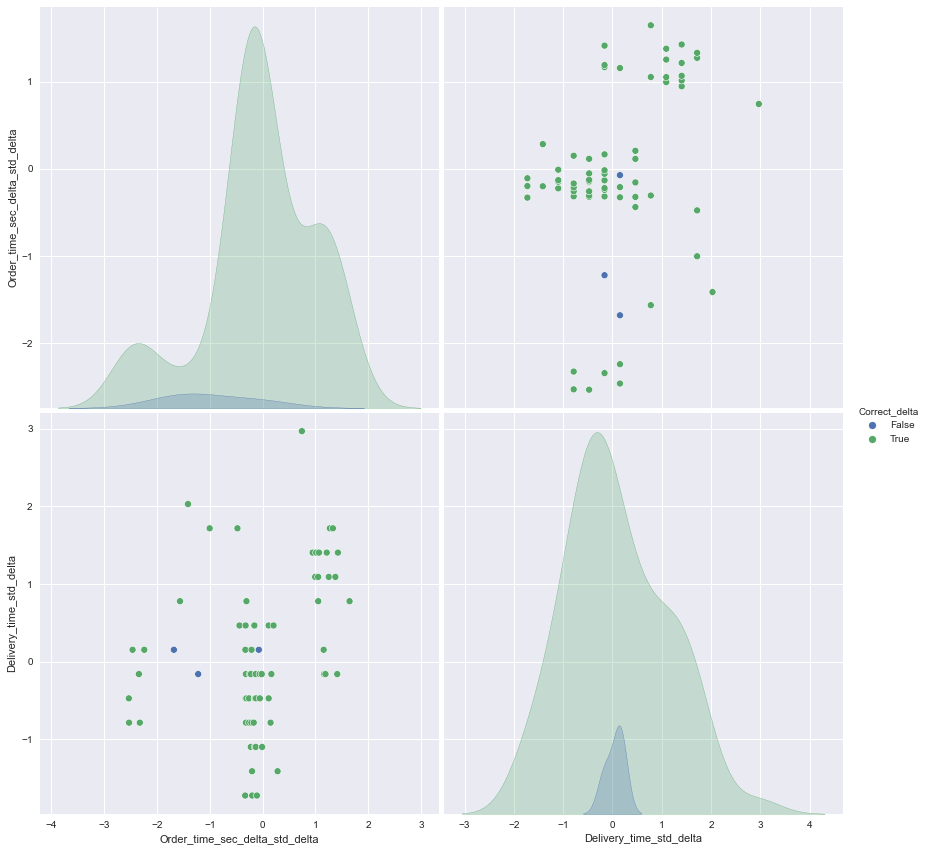

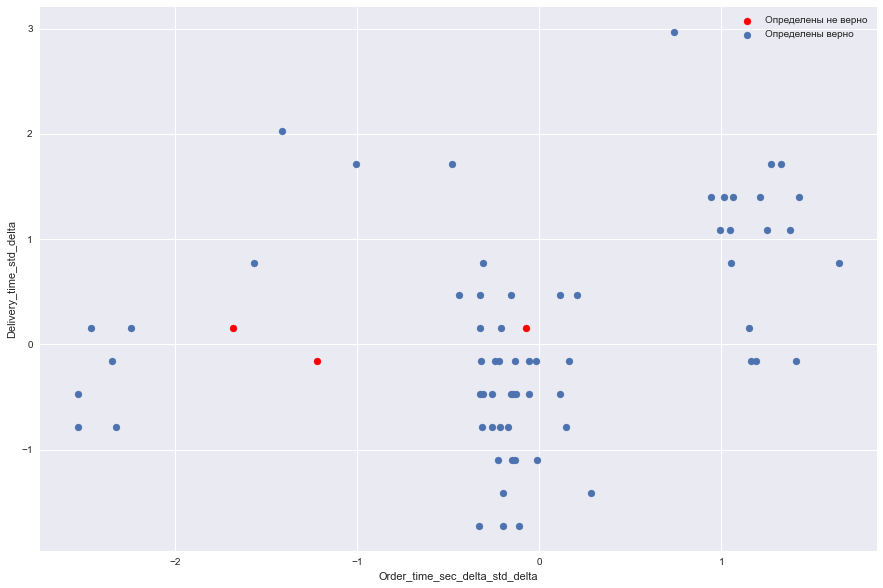

,Order_time,Delivery_time,Office,Order_time_sec,Order_time_sec_delta,Order_time_sec_delta_std_delta,Delivery_time_std_delta,y_pred_delta,Correct_delta
0,0:04:24,7,1,264,8092,-2.343222,-0.160937,1,True
1,0:10:10,5,1,610,8438,-2.325599,-0.786802,1,True
2,0:37:54,8,1,2274,10102,-2.240846,0.151996,1,True
3,3:41:23,8,0,13283,21111,-1.680119,0.151996,1,False
4,4:19:15,10,1,15555,23383,-1.564398,0.777861,1,True
...,...,...,...,...,...,...,...,...,...
63,20:37:29,12,0,74249,82077,1.425091,1.403727,0,True
64,21:49:31,10,0,78571,86399,1.645226,0.777861,0,True
65,23:02:09,6,1,82929,4357,-2.533458,-0.473870,1,True
66,23:03:24,5,1,83004,4432,-2.529638,-0.786802,1,True


In [60]:
"""Запустите, если сработала предыдущая ячейка"""

df_test = pd.read_excel('../datasets//iCafe_test.xlsx')
df_test['Order_time_sec'] = pd.to_timedelta(df_test.Order_time)//np.timedelta64(1,'s')
df_test = time_change(df_test)
y = 'Office'
x = ['Order_time_sec_delta', 'Delivery_time']
df_test = Processing_results(sc_delta, lr_delta, df_test, y, x, 'delta', [x])
df_test

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        25
           1       0.96      0.96      0.96        45

    accuracy                           0.94        70
   macro avg       0.94      0.94      0.94        70
weighted avg       0.94      0.94      0.94        70

              precision    recall  f1-score   support

           0       0.90      0.91      0.90        98
           1       0.95      0.95      0.95       182

    accuracy                           0.93       280
   macro avg       0.92      0.93      0.93       280
weighted avg       0.93      0.93      0.93       280



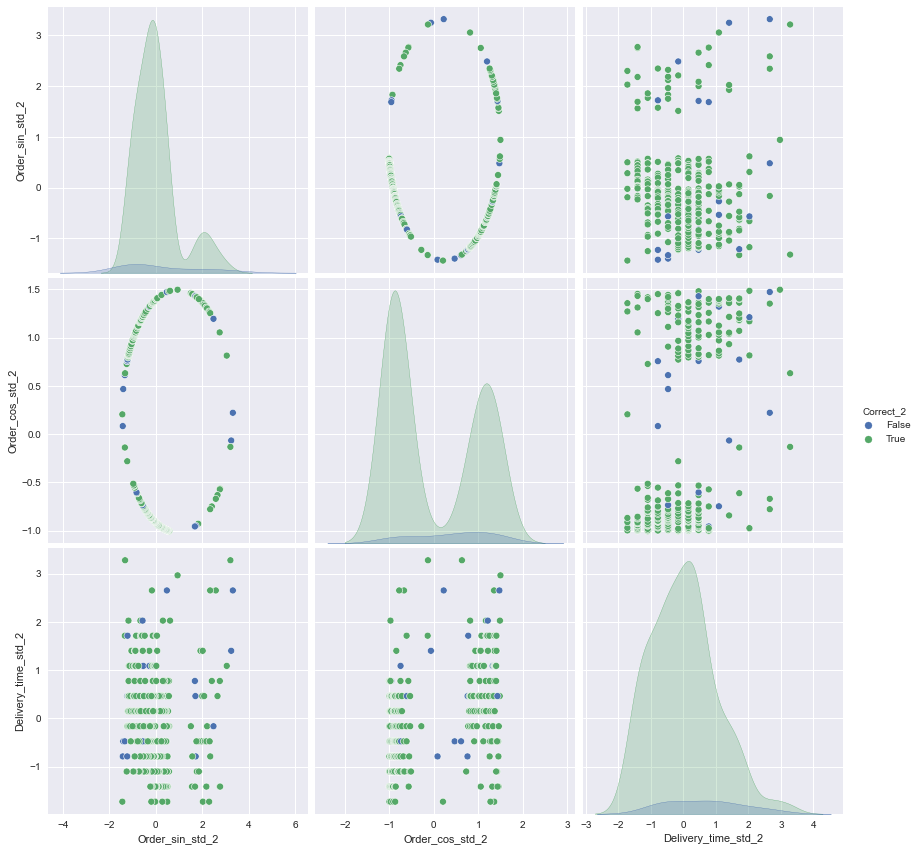

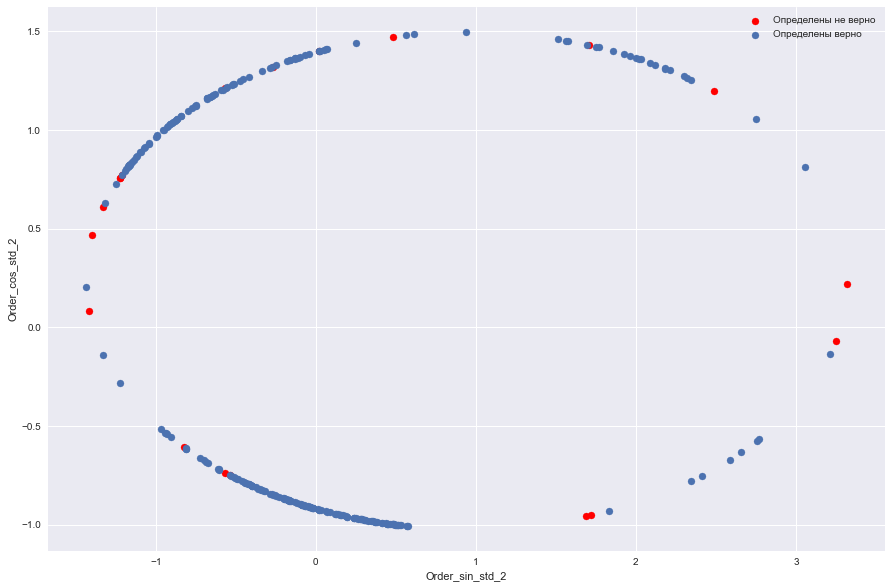

,Order_time,Delivery_time,Office,Order_time_sec,Order_time_sec_delta,Order_time_sec_delta_std_delta,Delivery_time_std_delta,y_pred_delta,Correct_delta,Order_sin,Order_cos,Order_sin_std_2,Order_cos_std_2,Delivery_time_std_2,y_pred_2,Correct_2
0,0:03:35,12,0,215,5877,-2.456039,1.403727,1,False,0.414495,0.910052,1.926828,1.384200,1.403727,0,True
1,0:07:14,6,1,434,6096,-2.444885,-0.473870,1,True,0.428935,0.903335,1.961165,1.375742,-0.473870,1,True
2,0:11:30,9,1,690,6352,-2.431846,0.464929,1,True,0.445677,0.895194,2.000974,1.365490,0.464929,1,True
3,0:13:48,12,0,828,6490,-2.424817,1.403727,1,False,0.454638,0.890676,2.022282,1.359802,1.403727,0,True
4,0:14:36,2,1,876,6538,-2.422372,-1.725600,1,True,0.457745,0.889084,2.029668,1.357796,-1.725600,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,23:39:14,3,1,85154,4416,-2.530453,-1.412668,1,True,0.315649,0.948876,1.691793,1.433089,-1.412668,1,True
276,23:40:55,9,1,85255,4517,-2.525309,0.464929,1,True,0.322610,0.946532,1.708344,1.430137,0.464929,0,False
277,23:45:19,6,1,85519,4781,-2.511863,-0.473870,1,True,0.340721,0.940164,1.751410,1.422119,-0.473870,1,True
278,23:47:07,4,1,85627,4889,-2.506362,-1.099735,1,True,0.348095,0.937459,1.768942,1.418713,-1.099735,1,True


In [64]:
"""Решение задания 2"""
df['Order_sin'] = np.sin(df.Order_time_sec_delta*math.pi/43200)
df['Order_cos'] = np.cos(df.Order_time_sec_delta*math.pi/43200)


y = df.Office
X = df[['Order_sin', 'Order_cos', 'Delivery_time']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

sc_2 = StandardScaler()
sc_2.fit(X_train)
X_train_std = sc_2.transform(X_train)
X_test_std = sc_2.transform(X_test)

lr_2 = LogisticRegression(random_state=21)
lr_2.fit(X_train_std, y_train)

y_pred_2 = lr_2.predict(X_test_std)

print(classification_report(y_test, y_pred_2))

y = 'Office'
X = ['Order_sin', 'Order_cos', 'Delivery_time']
x = ['Order_sin', 'Order_cos']
df = Processing_results(sc_2, lr_2, df, y, X, '2', [x])
df

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       0.94      1.00      0.97        47

    accuracy                           0.96        68
   macro avg       0.97      0.93      0.95        68
weighted avg       0.96      0.96      0.95        68



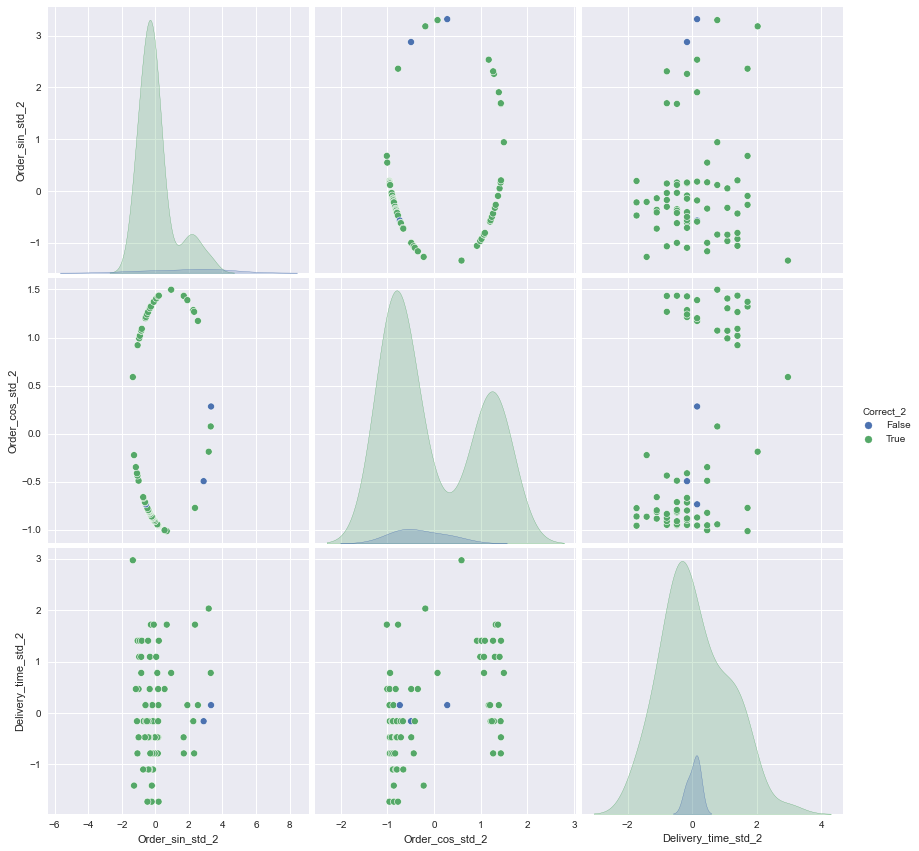

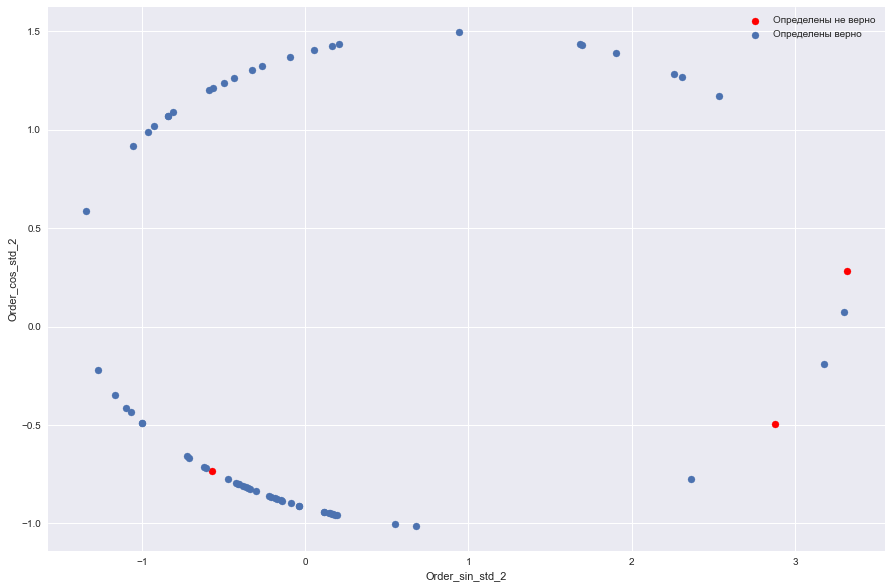

,Order_time,Delivery_time,Office,Order_time_sec,Order_time_sec_delta,Order_time_sec_delta_std_delta,Delivery_time_std_delta,y_pred_delta,Correct_delta,Order_sin,Order_cos,Order_sin_std_2,Order_cos_std_2,Delivery_time_std_2,y_pred_2,Correct_2
0,0:04:24,7,1,264,8092,-2.343222,-0.160937,1,True,0.555086,0.831793,2.261128,1.285654,-0.160937,1,True
1,0:10:10,5,1,610,8438,-2.325599,-0.786802,1,True,0.575838,0.817564,2.310471,1.267736,-0.786802,1,True
2,0:37:54,8,1,2274,10102,-2.240846,0.151996,1,True,0.670319,0.742073,2.535128,1.172676,0.151996,1,True
3,3:41:23,8,0,13283,21111,-1.680119,0.151996,1,False,0.999368,0.035554,3.317543,0.283002,0.151996,1,False
4,4:19:15,10,1,15555,23383,-1.564398,0.777861,1,True,0.991605,-0.129300,3.299085,0.075412,0.777861,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,20:37:29,12,0,74249,82077,1.425091,1.403727,0,True,-0.309224,0.950989,0.205965,1.435750,1.403727,0,True
64,21:49:31,10,0,78571,86399,1.645226,0.777861,0,True,-0.000073,1.000000,0.941068,1.497466,0.777861,0,True
65,23:02:09,6,1,82929,4357,-2.533458,-0.473870,1,True,0.311575,0.950222,1.682105,1.434783,-0.473870,1,True
66,23:03:24,5,1,83004,4432,-2.529638,-0.786802,1,True,0.316753,0.948508,1.694417,1.432626,-0.786802,1,True


In [65]:
df_test['Order_sin'] = np.sin(df_test.Order_time_sec_delta*math.pi/43200)
df_test['Order_cos'] = np.cos(df_test.Order_time_sec_delta*math.pi/43200)

y = 'Office'
X = ['Order_sin', 'Order_cos', 'Delivery_time']
x = ['Order_sin', 'Order_cos']
df_test = Processing_results(sc_2, lr_2, df_test, y, X, '2', [x])
df_test